In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

In [3]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


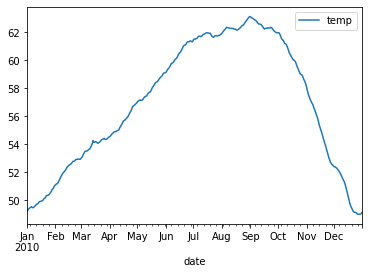

In [7]:
df.resample('D').mean().plot()
plt.show()

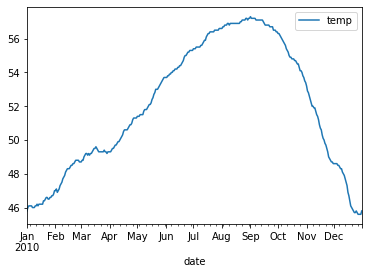

In [8]:
df.resample('D').min().plot()
plt.show()

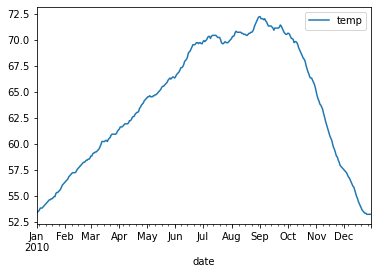

In [9]:
df.resample('D').max().plot()
plt.show()

In [10]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [11]:
df['month'] = df.index.month_name()
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [12]:
df.groupby('month').mean().idxmin()

temp    January
dtype: object

In [13]:
df.groupby('month').mean().sort_values('temp').head(1).reset_index()

,month,temp
0,January,49.98414


In [14]:
df.groupby('month').mean().idxmax()

temp    September
dtype: object

In [15]:
df.groupby('month').mean().max()

temp    62.487083
dtype: float64

In [16]:
df.groupby('month').mean().sort_values('temp').tail(1).reset_index()

,month,temp
0,September,62.487083


In [17]:
daily_df = df.resample('D').agg(['min','max']).temp
daily_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [18]:
daily_df['temp_diff'] = daily_df['max'] - daily_df['min']
daily_df.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [19]:
daily_df['month'] = daily_df.index.month_name()

In [20]:
daily_df.head()

,min,max,temp_diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January
2010-01-02,46.0,53.4,7.4,January
2010-01-03,46.1,53.5,7.4,January
2010-01-04,46.1,53.6,7.5,January
2010-01-05,46.1,53.8,7.7,January


In [21]:
daily_df.groupby('month').max().sort_values('temp_diff').tail(1)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


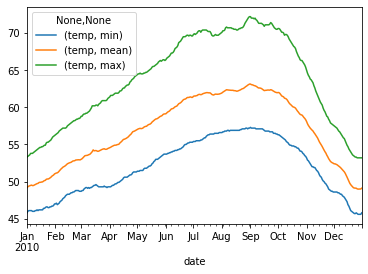

In [22]:
df.drop(columns='month').resample('D').agg(['min', 'mean','max']).plot()
plt.show()

#### Seattle Weather:

In [23]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [25]:
df = df.set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
df.index.strftime('%Y-%m')

Index(['2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01',
       '2012-01', '2012-01', '2012-01', '2012-01',
       ...
       '2015-12', '2015-12', '2015-12', '2015-12', '2015-12', '2015-12',
       '2015-12', '2015-12', '2015-12', '2015-12'],
      dtype='object', name='date', length=1461)

In [27]:
df['year_month'] = df.index.strftime('%Y-%b')
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan


In [28]:
df.groupby('year_month').sum().precipitation.idxmax()

'2015-Dec'

In [33]:
df.groupby('year_month').sum().precipitation.max()

284.5

In [35]:
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January


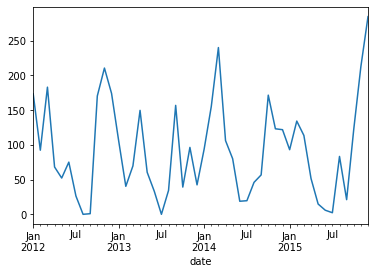

In [37]:
df.resample('M').sum().precipitation.plot()
plt.show()

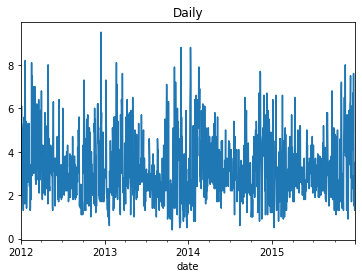

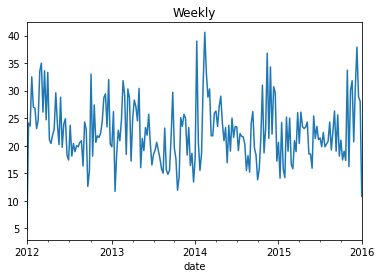

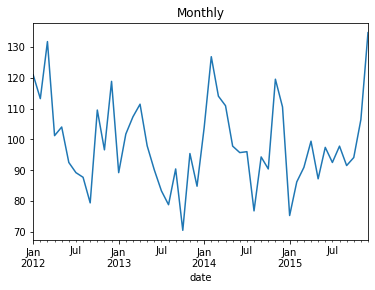

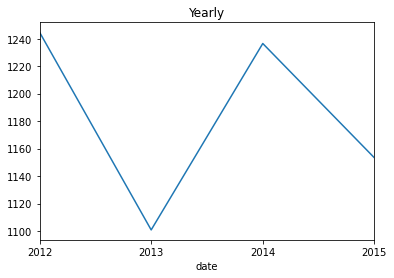

In [38]:
df.resample('D').sum().wind.plot()
plt.title('Daily')
plt.show()
df.resample('W').sum().wind.plot()
plt.title('Weekly')
plt.show()
df.resample('M').sum().wind.plot()
plt.title('Monthly')
plt.show()
df.resample('Y').sum().wind.plot()
plt.title('Yearly')
plt.show()

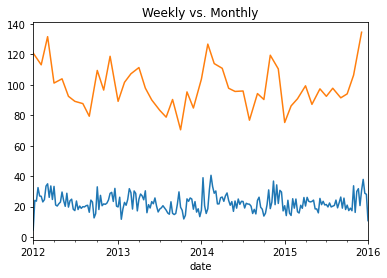

In [39]:
# Most useful, Weekly, or if you want a little clearer Monthly. I personally like Weekly.
df.resample('W').sum().wind.plot()
df.resample('M').sum().wind.plot()
plt.title('Weekly vs. Monthly')
plt.show()

In [41]:
df.groupby('year_month').sum().wind.idxmax()

'2015-Dec'

In [42]:
df.groupby('year_month').sum().wind.max()

134.6

In [43]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [46]:
df['is_sunny'] = df.weather == 'sun'
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012


In [49]:
df.groupby('year').sum().is_sunny.sort_values().tail(1)

year
2014    211
Name: is_sunny, dtype: int64

In [50]:
df['is_rainy'] = df.weather == 'rain'
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year,is_rainy
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012,True


In [51]:
df.groupby('month').sum().is_rainy.sort_values().tail(1)

month
February    40
Name: is_rainy, dtype: int64

In [52]:
df['is_precipitation'] = df.precipitation > 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,is_sunny,year,is_rainy,is_precipitation
date,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-Jan,January,False,2012,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-Jan,January,False,2012,True,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-Jan,January,False,2012,True,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-Jan,January,False,2012,True,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-Jan,January,False,2012,True,True


In [53]:
df.groupby('month').sum().is_precipitation.sort_values().tail(1)

month
December    81
Name: is_precipitation, dtype: int64

---

In [55]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [57]:
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [58]:
df ['delay'] = np.where(df.delay < 0, 0, df.delay) #Interesting way to change this with numpy.
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [59]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [62]:
print(f"Time with Highest Delay: {df.groupby('hour').mean().delay.idxmax()} 'oclock")

Time with Highest Delay: 3 'oclock


In [63]:
print(f"Delay in Minutes: {df.groupby('hour').mean().delay.max()}")

Delay in Minutes: 302.5


In [65]:
df.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

In [66]:
df['day_of_week'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [67]:
df.groupby('day_of_week').mean().delay.sort_values()

day_of_week
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [68]:
# Friday has a much higher average delay vs. Monday, buy about 10 minutes.

In [69]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [70]:
df.groupby('month').mean().delay.sort_values()

month
March        9.875287
January     11.301592
February    12.306106
Name: delay, dtype: float64

In [72]:
# Only just over a 3 minute difference between months, 
# These are colder/snowier months, I'd be interested to see vs. summer months.